<a href="https://colab.research.google.com/github/corrine1106/Project_EDA/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format',lambda x: '%.2f'%x)

In [275]:
df = pd.read_csv('/content/drive/MyDrive/T大使/data3_project.csv')

In [276]:
df.head()
# quantity<0 == 退換貨

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [277]:
# 練習1
df.loc[df['Quantity']>2,['StockCode','Description','Quantity','InvoiceDate','UnitPrice']]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice
0,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00
1,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00
2,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00
4,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00
5,K8018,植粹養護潤髮乳475ml,8.00,2019-01-01,549.00
...,...,...,...,...,...
1404430,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00
1404431,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00
1404432,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00
1404433,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00


In [278]:
# 練習2
df.loc[1000,['CustomerID','Description']]

CustomerID    9100001536064.00
Description        頭部活氧熱舒壓課程單堂
Name: 1000, dtype: object

# Data Wrangling

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [280]:
df.Description.value_counts()

全背順氣活力SPA課程單堂            58636
清除環境中腸病毒濕紙巾10抽           52599
plus5智頻美塑儀課程單堂           46660
(新)溫熱刮痧課程單堂              34129
全身健康優化SPA課程單堂            33770
                         ...  
平衡調理素1000ml                  1
手部璀璨凝膠課程單堂                   1
新極線音波拉提100條(單堂200條專用)        1
淋巴循環舒壓SPA單堂                  1
新精準無痕BOTOX瘦肩/美肩(單堂會員)        1
Name: Description, Length: 870, dtype: int64

In [281]:
df.isna().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [282]:
df.loc[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1544,PS1001008016,MD-1265,2019營運售全背,32.00,2019-01-03,1859.00,nan,總管理處,NaN,NaN
1545,PS1001008016,JZA4G2,輕鬆．清新複方按摩油30ml,40.00,2019-01-03,2699.00,nan,總管理處,NaN,NaN
3470,PS1001008018,MD-1266,2019營運售太極,8.00,2019-01-05,509.00,nan,總管理處,NaN,NaN
3471,PS1001008018,K8016,植粹清香沐浴精500ml,8.00,2019-01-05,497.00,nan,總管理處,NaN,NaN
3472,PS1001008018,K8017,植粹養護洗髮精500ml,8.00,2019-01-05,497.00,nan,總管理處,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1370084,PS5525021426,BJ079,佐登妮絲６號複方精油10ml,8.00,2020-12-14,1099.00,nan,高屏全區,NaN,NaN
1370085,PS5525021426,JYA1G1,玫瑰複方精油5ml HALAL,8.00,2020-12-14,1099.00,nan,高屏全區,NaN,NaN
1382674,PS5455008904,ZFE02,工本費,8.00,2020-12-21,509.00,nan,南區,NaN,NaN
1396234,PS5414018463,JZB4G1,呼暢護隨精油30ml,-8.00,2020-12-28,-1720.00,nan,南區,NaN,NaN


In [283]:
df.drop(df.loc[df['CustomerID'].isna()].index, inplace=True)

In [284]:
df.shape

(1403724, 10)

In [285]:
len(df.loc[(df['Quantity']<0) | (df['UnitPrice']<0)])

6612

In [286]:
# df.loc[(df['Quantity']<0) | (df['UnitPrice']<0)].loc[~df.loc[(df['Quantity']<0) | (df['UnitPrice']<0)].apply(lambda x: True if (x['Quantity']<0) & (x['UnitPrice']<0) else False,axis=1)]
# df.loc[(df['Quantity']<0) | (df['UnitPrice']<0)].loc[df.loc[(df['Quantity']<0) | (df['UnitPrice']<0)].apply(lambda x: True if (x['Quantity']<0) & (x['UnitPrice']<0) else False,axis=1)]

In [287]:
def transfer_revernue(row):
  if (row['Quantity'] < 0) & (row['UnitPrice']<0):
    return row['Quantity']*-row['UnitPrice']
  else:
    return row['Quantity']*row['UnitPrice']
    

In [288]:
df['Revenue'] = df.apply(transfer_revernue,axis=1)

In [289]:
df.Revenue.describe()

count     1403724.00
mean        82668.84
std        922440.49
min     -41471304.00
25%          4672.00
50%          8752.00
75%         25904.00
max     702441768.00
Name: Revenue, dtype: float64

In [290]:
df.loc[df['Revenue'] == -41471304.00]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
437807,PR5373003318,HE60A01,膠原晶球水導膜課程單堂,-744.00,2019-08-30,-55741.00,9100000605501.00,彰雲區,2010-05-10,2012-10-12,-41471304.00


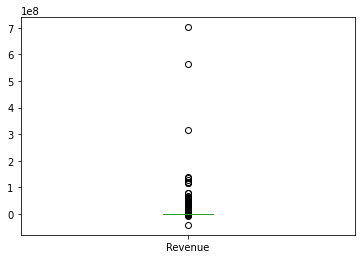

In [291]:
df.Revenue.plot.box()

# 異常值

## Z-score

In [292]:
df1 = df.copy()

In [293]:
def Z_score(column,df):
    df_temp = df.copy()
    df_temp['zscore'] = (df_temp[column] - df_temp[column].mean())/df_temp[column].std(ddof=0)
    df_temp['Outlier'] = (df_temp['zscore'].abs()>3).astype(int)
    # print(df.loc[df['Outlier']>0 , [column,'zscore']])
    # print(df.loc[df['Outlier']==0 , [column,'zscore']])
    df_temp = df_temp.loc[df_temp['Outlier']==0]
    return df_temp

In [294]:
df['Revenue_zscore'] = (df['Revenue'] - df['Revenue'].mean())/df['Revenue'].std(ddof=0)
df['Outlier'] = (df['Revenue_zscore'].abs()>3).astype(int)
print(df.loc[df['Outlier']>0 , ['Revenue','Revenue_zscore']])
print(df.loc[df['Outlier']==0 , ['Revenue','Revenue_zscore']])
df = df.loc[df['Outlier']==0]
df.shape

            Revenue  Revenue_zscore
1699     4844064.00            5.16
4458     4023600.00            4.27
4668     5788320.00            6.19
5070    11329248.00           12.19
6362     4023600.00            4.27
...             ...             ...
1402112  6006792.00            6.42
1402113  4755136.00            5.07
1402115  5851016.00            6.25
1402120 17226552.00           18.59
1403200  5950008.00            6.36

[692 rows x 2 columns]
          Revenue  Revenue_zscore
0        10072.00           -0.08
1         6712.00           -0.08
2         6712.00           -0.08
3       -12008.00           -0.10
4         5376.00           -0.08
...           ...             ...
1404430  47136.00           -0.04
1404431   2472.00           -0.09
1404432   8752.00           -0.08
1404433   2640.00           -0.09
1404434   3528.00           -0.09

[1403032 rows x 2 columns]


(1403032, 13)

In [295]:
df.Revenue.describe()

count    1403032.00
mean       77095.34
std       237215.35
min     -2370144.00
25%         4672.00
50%         8752.00
75%        25672.00
max      2844192.00
Name: Revenue, dtype: float64

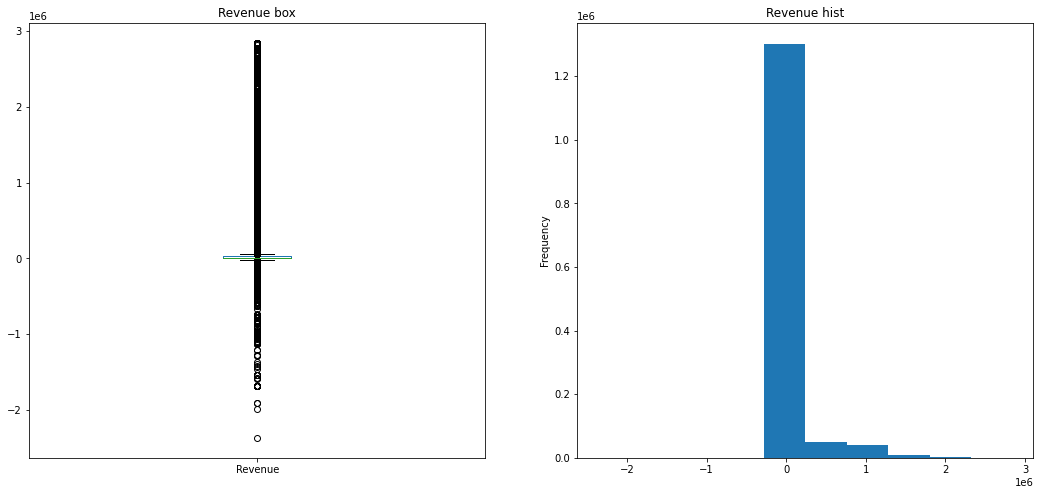

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1,2,figsize = (18,8))
df['Revenue'].plot.box(ax = axis[0])
axis[0].set_title('Revenue box')
df['Revenue'].plot.hist(ax = axis[1])
axis[1].set_title("Revenue hist")
plt.show()

## IQR

In [297]:
df2 = df1.copy()

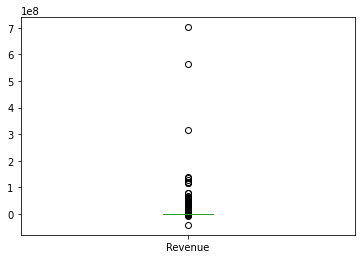

In [298]:
df2['Revenue'].plot.box()

In [299]:
def Outlier_treatmeant(datacolumn):
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  high_range = Q3 + (1.5*IQR)
  return lower_range, high_range

lowerbound, higherbound = Outlier_treatmeant(df2['Revenue'])
df2.loc[(df2['Revenue']>higherbound) | (df2['Revenue'] < lowerbound)]
df2 = df2.loc[(df2['Revenue']<higherbound) & (df2['Revenue'] > lowerbound)]

In [300]:
def Outlier(column,df,method='zscore'):
    if method == 'zscore':
       return Z_score(column,df) 
    else:
        df_temp = df.copy()
        lowerbound, higherbound = Outlier_treatmeant(df_temp[column])
        df_temp.loc[(df_temp['Revenue']>higherbound) | (df_temp['Revenue'] < lowerbound)]
        df_temp = df_temp.loc[(df_temp['Revenue']<higherbound) & (df_temp['Revenue'] > lowerbound)]
        return df_temp

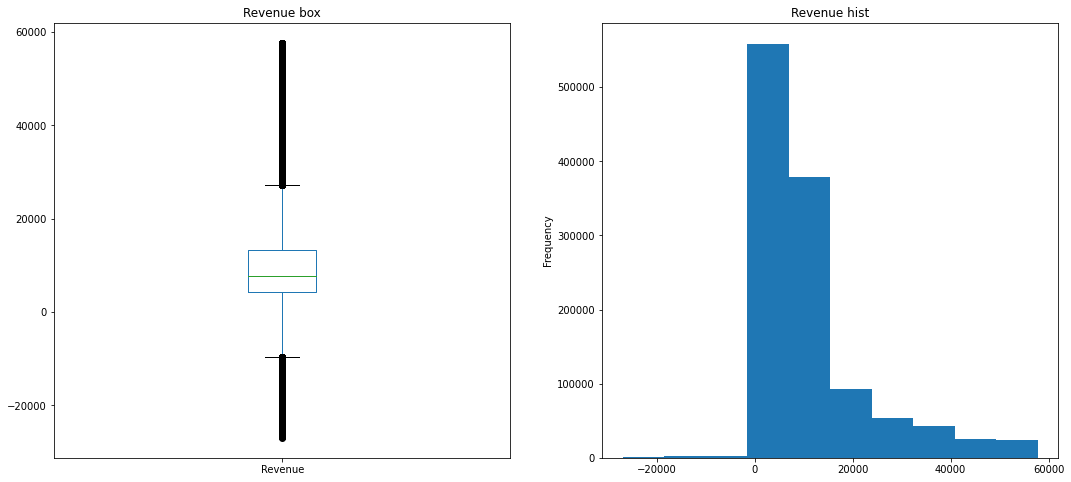

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1,2,figsize = (18,8))
df2['Revenue'].plot.box(ax = axis[0])
axis[0].set_title('Revenue box')
df2['Revenue'].plot.hist(ax = axis[1])
axis[1].set_title("Revenue hist")
plt.show()

In [302]:
print(df.Revenue.describe())
print(df2.Revenue.describe())

count    1403032.00
mean       77095.34
std       237215.35
min     -2370144.00
25%         4672.00
50%         8752.00
75%        25672.00
max      2844192.00
Name: Revenue, dtype: float64
count   1181196.00
mean      11039.57
std       11547.11
min      -26976.00
25%        4216.00
50%        7672.00
75%       13408.00
max       57744.00
Name: Revenue, dtype: float64


In [303]:
df2.to_csv('/content/drive/MyDrive/T大使/df_IQR.csv')

# EDA

In [304]:
df_IQR = df2.copy()

## Monthly revenue

In [305]:
df_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1181196 non-null  object 
 1   StockCode          1181196 non-null  object 
 2   Description        1181196 non-null  object 
 3   Quantity           1181196 non-null  float64
 4   InvoiceDate        1181196 non-null  object 
 5   UnitPrice          1181196 non-null  float64
 6   CustomerID         1181196 non-null  float64
 7   Country            1181196 non-null  object 
 8   member_start_date  1144520 non-null  object 
 9   first_trans_date   1177960 non-null  object 
 10  Revenue            1181196 non-null  float64
dtypes: float64(4), object(7)
memory usage: 108.1+ MB


In [306]:
df_IQR['InvoiceDate'] = pd.to_datetime(df_IQR['InvoiceDate'])
df_IQR.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1181196 non-null  object        
 1   StockCode          1181196 non-null  object        
 2   Description        1181196 non-null  object        
 3   Quantity           1181196 non-null  float64       
 4   InvoiceDate        1181196 non-null  datetime64[ns]
 5   UnitPrice          1181196 non-null  float64       
 6   CustomerID         1181196 non-null  float64       
 7   Country            1181196 non-null  object        
 8   member_start_date  1144520 non-null  object        
 9   first_trans_date   1177960 non-null  object        
 10  Revenue            1181196 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 108.1+ MB


In [307]:
df_IQR['YearMonth'] = df_IQR['InvoiceDate'].map(lambda date: 100*date.year+date.month)

In [308]:
df_IQR.InvoiceDate.dt.year

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1404430    2020
1404431    2020
1404432    2020
1404433    2020
1404434    2020
Name: InvoiceDate, Length: 1181196, dtype: int64

In [309]:
tx_revenue = df_IQR.groupby('YearMonth')['Revenue'].sum().reset_index()

In [310]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     int64  
 1   Revenue    24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [311]:
tx_revenue['YearMonth'] = tx_revenue['YearMonth'].astype(str)

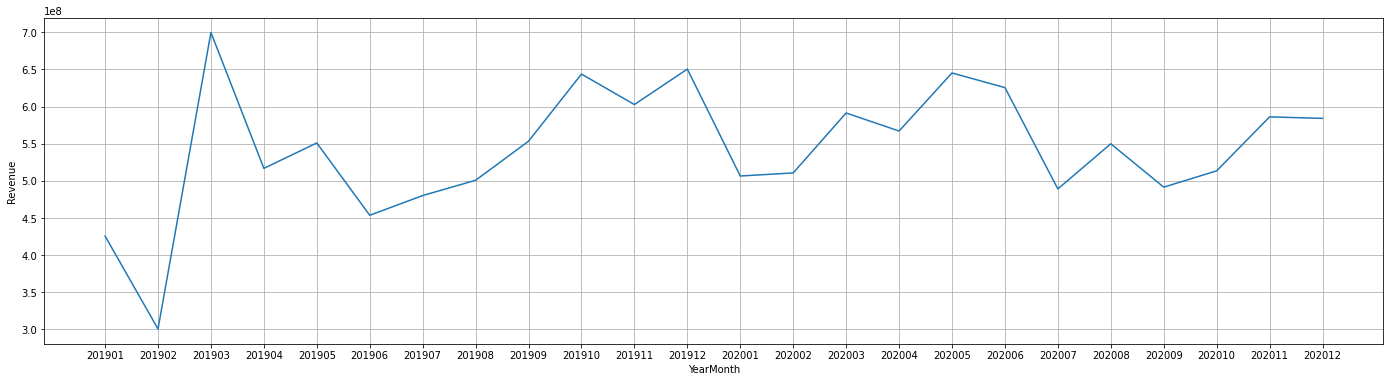

In [312]:
figure,axis = plt.subplots(figsize=(24,6))
sns.lineplot(ax=axis, x='YearMonth', y='Revenue',data=tx_revenue)
axis.grid()
plt.show()

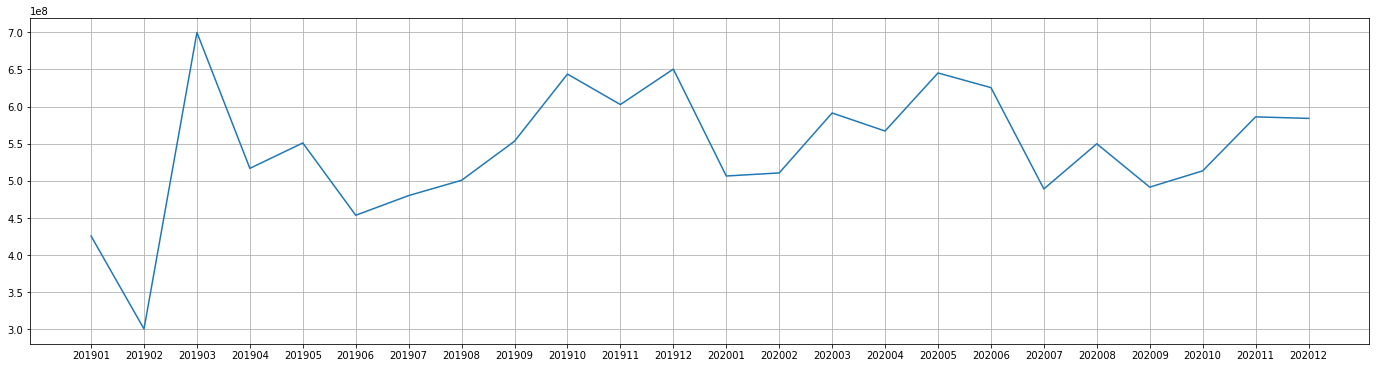

In [313]:
figure,axis = plt.subplots(figsize=(24,6))
axis.plot(tx_revenue['YearMonth'], tx_revenue['Revenue'])
axis.grid()
plt.show()

## Monthly growth rate

In [314]:
tx_revenue['GrowthRate'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,YearMonth,Revenue,GrowthRate
0,201901,425743824.00,nan
1,201902,300617976.00,-0.29
2,201903,699778888.00,1.33
3,201904,516812544.00,-0.26
4,201905,551044368.00,0.07
5,201906,453681976.00,-0.18
6,201907,480213760.00,0.06
7,201908,500785128.00,0.04
8,201909,553368896.00,0.11
9,201910,643763416.00,0.16


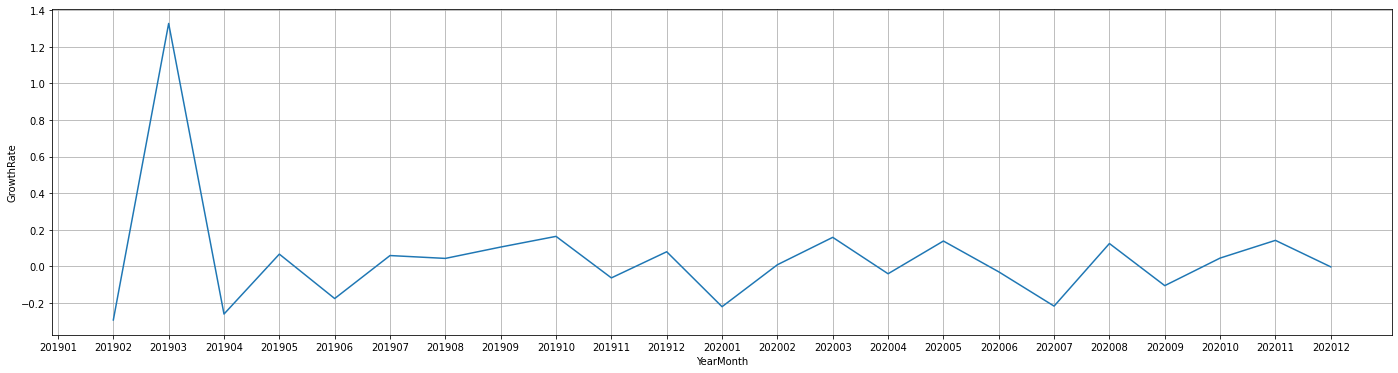

In [315]:
figure,axis = plt.subplots(figsize=(24,6))
sns.lineplot(ax=axis, x='YearMonth', y='GrowthRate',data=tx_revenue)
axis.grid()
plt.show()

## Monthly Order Count

In [316]:
df_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1181196 non-null  object        
 1   StockCode          1181196 non-null  object        
 2   Description        1181196 non-null  object        
 3   Quantity           1181196 non-null  float64       
 4   InvoiceDate        1181196 non-null  datetime64[ns]
 5   UnitPrice          1181196 non-null  float64       
 6   CustomerID         1181196 non-null  float64       
 7   Country            1181196 non-null  object        
 8   member_start_date  1144520 non-null  object        
 9   first_trans_date   1177960 non-null  object        
 10  Revenue            1181196 non-null  float64       
 11  YearMonth          1181196 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 117.2+ MB


In [317]:
tx_order = df_IQR.groupby('YearMonth')['Quantity'].sum().reset_index()
tx_order['YearMonth'] = tx_order['YearMonth'].astype(str)

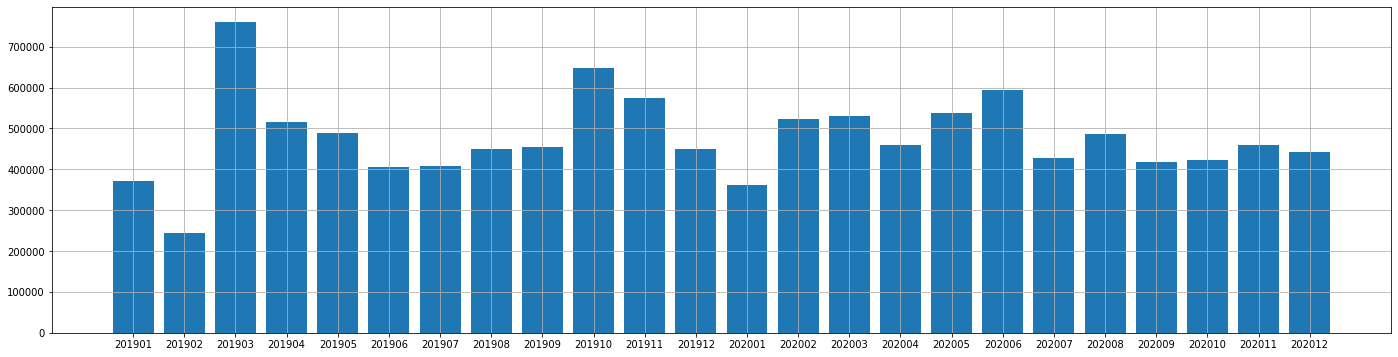

In [318]:
figure,axis = plt.subplots(figsize=(24,6))
axis.bar(tx_order['YearMonth'], tx_order['Quantity'])
axis.grid()
plt.show()

## Average Revenue per Order​

In [319]:
avg_revernue = df_IQR.groupby('YearMonth')['Revenue'].mean().reset_index()
avg_revernue['YearMonth'] = avg_revernue['YearMonth'].astype(str)

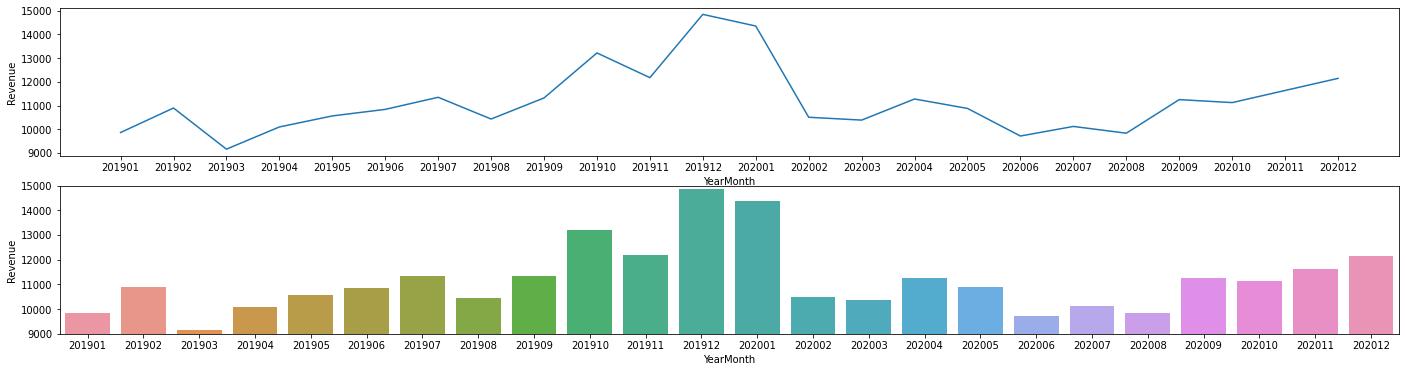

In [320]:
figure,axis = plt.subplots(2,1,figsize=(24,6))
sns.lineplot(ax=axis[0], x='YearMonth', y='Revenue',data=avg_revernue)
sns.barplot(ax=axis[1], x='YearMonth', y='Revenue',data=avg_revernue)
axis[1].set(ylim=(9000, 15000))
plt.show()

## Monthly Active Customers​

In [321]:
act_custom = df_IQR.groupby('YearMonth')['CustomerID'].nunique().reset_index()

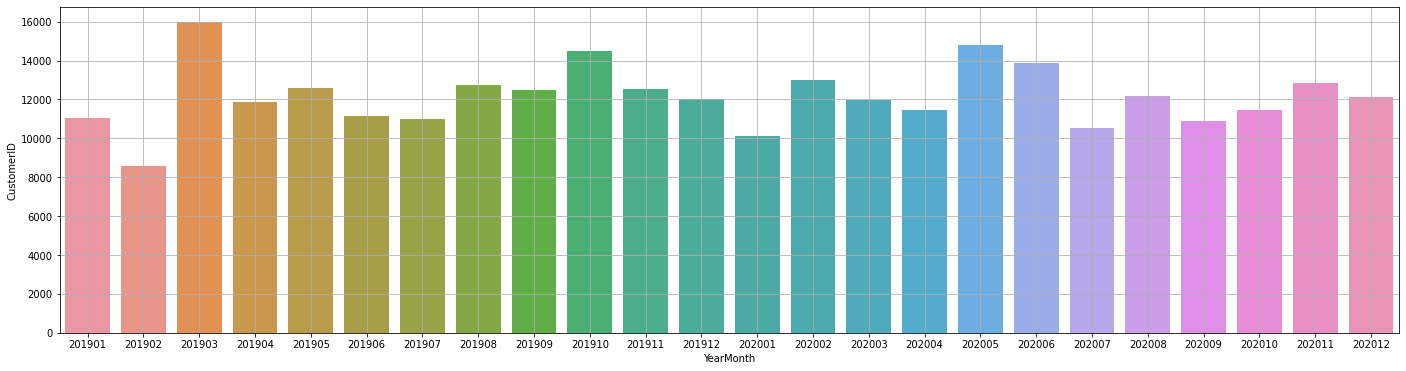

In [322]:
figure,axis = plt.subplots(figsize=(24,6))
sns.barplot(ax=axis, x='YearMonth', y='CustomerID',data=act_custom)
axis.grid()
plt.show()

In [323]:
act_custom['YearMonth'] = act_custom['YearMonth'].astype(str)

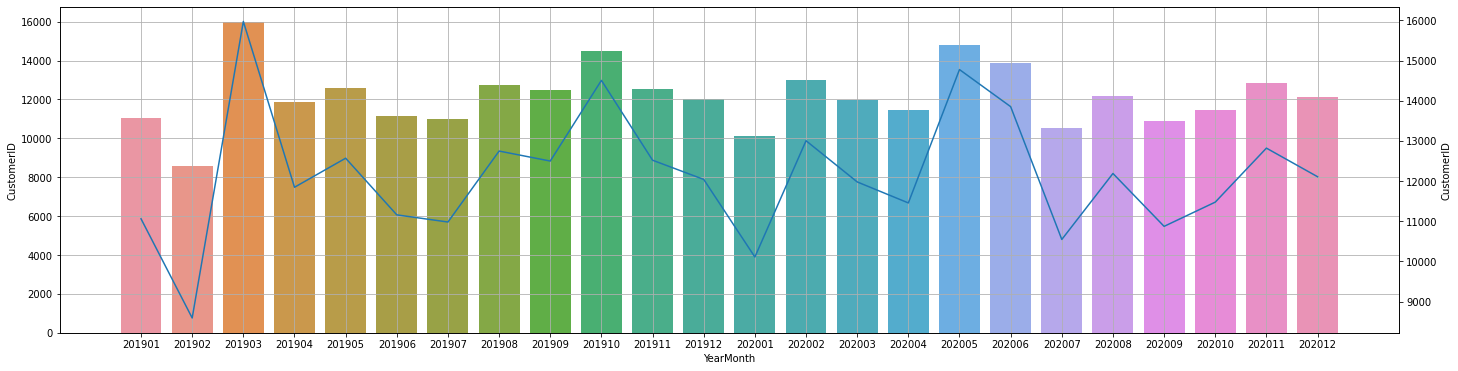

In [324]:
figure,axis = plt.subplots(figsize=(24,6))
sns.barplot(ax=axis, x='YearMonth', y='CustomerID',data=act_custom)
axis2 = axis.twinx()
sns.lineplot(ax=axis2, x='YearMonth', y='CustomerID',data=act_custom)
axis.grid()
plt.show()

## Revenue per month for New and Existing Customers​

In [325]:
df_IQR['member_start_date'] = pd.to_datetime(df_IQR['member_start_date'])
df_IQR['member_YearMonth'] = df_IQR['member_start_date'].map(lambda date: 100*date.year+date.month)

In [326]:
new_custom = df_IQR.loc[df_IQR['YearMonth'] == df_IQR['member_YearMonth']]
exist_custom = df_IQR.loc[~(df_IQR['YearMonth'] == df_IQR['member_YearMonth'])]
new_custom['YearMonth'] = new_custom['YearMonth'].astype(str)
exist_custom['YearMonth'] = exist_custom['YearMonth'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


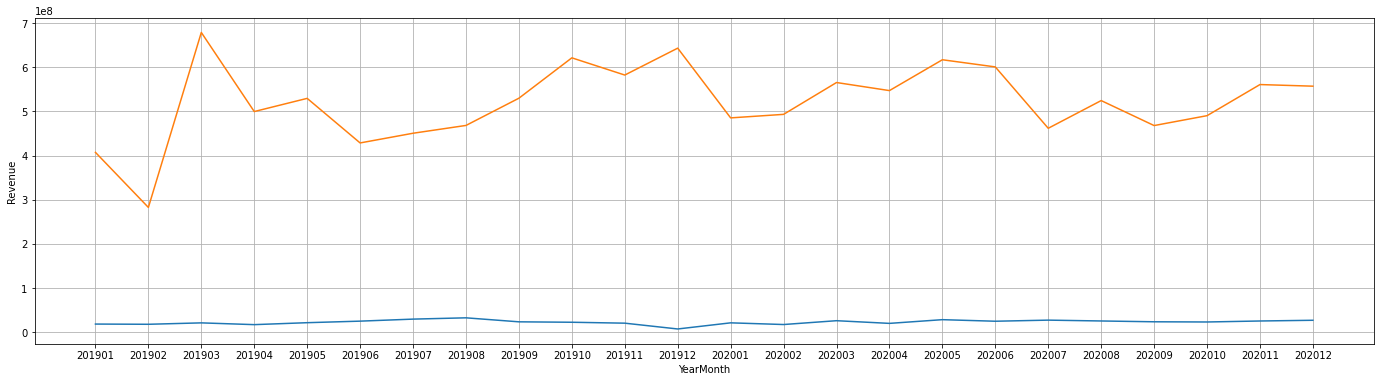

In [327]:
figure,axis = plt.subplots(figsize=(24,6))
sns.lineplot(ax=axis, x='YearMonth', y='Revenue',data=new_custom.groupby('YearMonth')['Revenue'].sum().reset_index())
sns.lineplot(ax=axis, x='YearMonth', y='Revenue',data=exist_custom.groupby('YearMonth')['Revenue'].sum().reset_index())
axis.grid()
plt.show()

## New Customer Ratio​

In [328]:
df_IQR['new_or_not'] = df_IQR.apply(lambda row: 1 if row['YearMonth']==row['member_YearMonth'] else 0 ,axis=1)
custom_ratio = df_IQR.groupby('YearMonth')['new_or_not'].mean().reset_index()
custom_ratio

,YearMonth,new_or_not
0,201901,0.04
1,201902,0.05
2,201903,0.03
3,201904,0.03
4,201905,0.04
5,201906,0.05
6,201907,0.06
7,201908,0.05
8,201909,0.04
9,201910,0.04


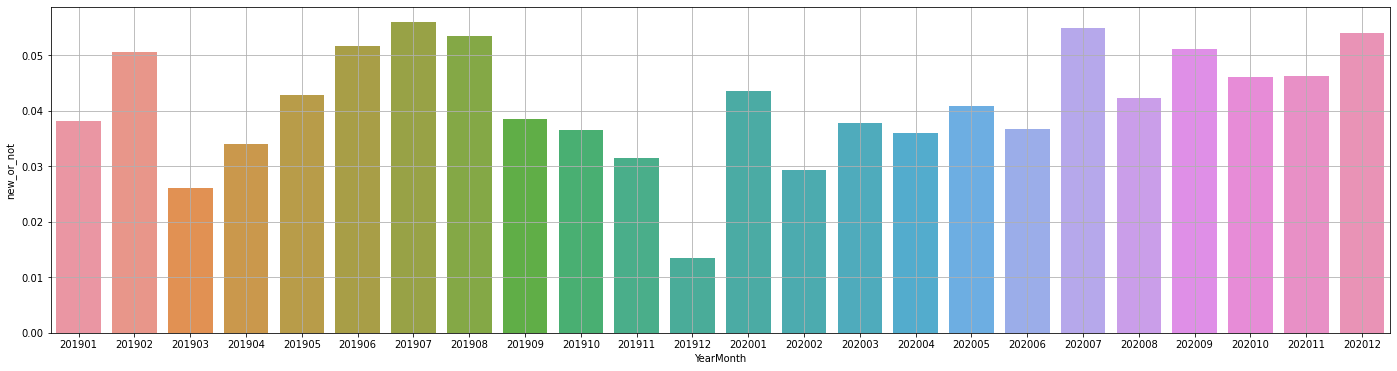

In [329]:
figure,axis = plt.subplots(figsize=(24,6))
sns.barplot(ax=axis, x='YearMonth', y='new_or_not',data=custom_ratio)
axis.grid()
plt.show()

# Customer Clustering

## R

In [362]:
# 分群的項目
# Recency 客戶活躍度
# Frequency
# Revenue(Monetary)
# 最後再依照分群結果分出分出RFM模型

df = pd.read_csv('/content/drive/MyDrive/T大使/df_IQR.csv')
sales_data_user = pd.DataFrame(df['CustomerID'].unique())
sales_data_user.columns = ['CustomerID']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# 計算不活躍天數
tx_max_purchase = df.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max()-tx_max_purchase['MaxPurchaseDate']).dt.days
# tx_max_purchase['Recency_2'] = ((tx_max_purchase['MaxPurchaseDate'].max()-tx_max_purchase['MaxPurchaseDate']))/np.timedelta64(1,'D')
sales_data_user = pd.merge(sales_data_user, tx_max_purchase[['CustomerID','Recency']],on='CustomerID')

In [363]:
tx_max_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78444 entries, 0 to 78443
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       78444 non-null  float64       
 1   MaxPurchaseDate  78444 non-null  datetime64[ns]
 2   Recency          78444 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 MB


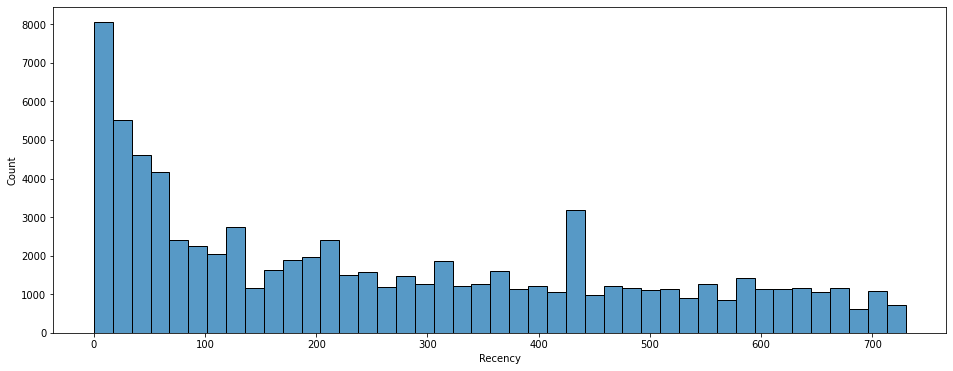

In [364]:
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(data = sales_data_user['Recency'], ax=axes)
plt.show()

In [365]:
sales_data_user.Recency.describe()

count   78444.00
mean      259.36
std       216.96
min         0.00
25%        57.00
50%       212.00
75%       428.00
max       730.00
Name: Recency, dtype: float64

In [366]:
# function for ordering cluster numbers
def order_cluster(cluster_field_name,target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']],on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={'index':cluster_field_name})
    return df_final

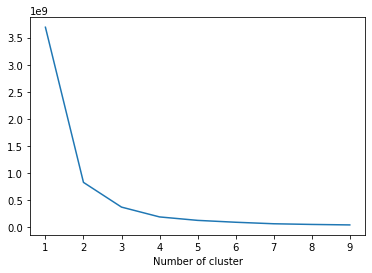

In [367]:
# Elbow Method
from sklearn.cluster import KMeans

sse={}
tx_recency = sales_data_user[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [368]:
# 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Recency']])
sales_data_user['RecencyCluster'] = kmeans.predict(sales_data_user[['Recency']])

sales_data_user = order_cluster('RecencyCluster','Recency',sales_data_user,False)

sales_data_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,12645.00,622.89,56.41,525.00,578.00,620.00,670.00,730.00
1,15650.00,424.62,53.28,330.00,378.00,427.00,465.00,524.00
2,17868.00,232.85,52.47,143.00,189.00,225.00,279.00,329.00
3,32281.00,51.51,40.47,0.00,17.00,42.00,81.00,142.00


## F

In [369]:
# Frequency
tx_frequency = df.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

sales_data_user = pd.merge(sales_data_user,tx_frequency, on='CustomerID')
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency
0,9100002488768.00,123,3,23
1,9100000301403.00,82,3,37
2,9100000382303.00,13,3,76
3,9100000045758.00,54,3,91
4,9100000190649.00,34,3,104
...,...,...,...,...
78439,9100002762738.00,330,1,2
78440,9100002762752.00,330,1,2
78441,9100002583531.00,330,1,3
78442,9100000613452.00,330,1,2


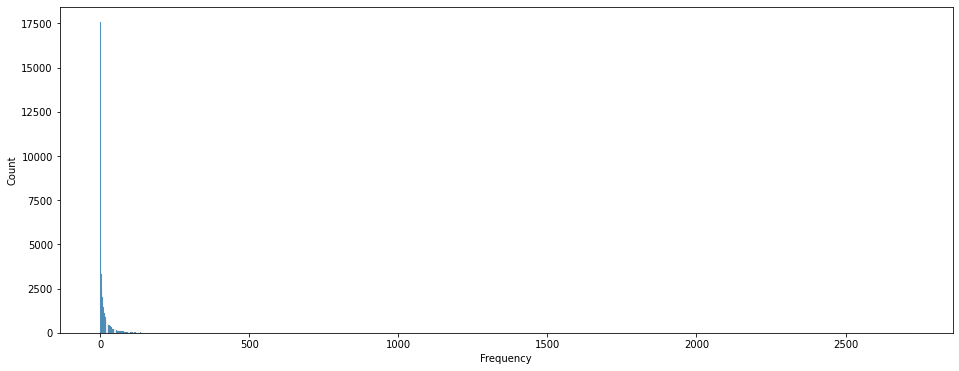

In [370]:
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Frequency'],ax=axes)
plt.show()

In [371]:
tx_frequency.Frequency.describe()
# df.loc[df['CustomerID'] == tx_frequency.loc[tx_frequency['Frequency']==2723]['CustomerID'].values[0]]

count   78444.00
mean       15.06
std        29.15
min         1.00
25%         2.00
50%         5.00
75%        18.00
max      2723.00
Name: Frequency, dtype: float64

In [372]:
# 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])

sales_data_user = order_cluster('FrequencyCluster','Frequency',sales_data_user,False)

sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3.00,2121.00,549.93,1645.00,1820.00,1995.00,2359.00,2723.00
1,1636.00,136.68,61.86,92.00,103.00,119.00,148.00,1026.00
2,12119.00,45.44,16.65,26.00,32.00,41.00,56.00,91.00
3,64686.00,6.19,6.40,1.00,1.00,3.00,9.00,25.00


In [373]:
# 清除消費的異常值 ∵最大的那一群只有三筆
sales_data_user2 = sales_data_user.copy()
# Zscore
sales_data_user['zscore'] = (sales_data_user['Frequency'] - sales_data_user['Frequency'].mean())/sales_data_user['Frequency'].std(ddof=0)
sales_data_user['Outlier'] = (sales_data_user['zscore'].abs()>3).astype(int)
sales_data_user = sales_data_user.loc[sales_data_user['Outlier']==0]
# IQR

lowerbound, higherbound = Outlier_treatmeant(sales_data_user2['Frequency'])
sales_data_user2.loc[(sales_data_user2['Frequency']>higherbound) | (sales_data_user2['Frequency'] < lowerbound)]
sales_data_user2 = sales_data_user2.loc[(sales_data_user2['Frequency']<higherbound) & (sales_data_user2['Frequency'] > lowerbound)]

In [374]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])

sales_data_user = order_cluster('FrequencyCluster','Frequency',sales_data_user,False)

sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3006.00,75.25,12.02,59.00,65.00,73.00,84.00,102.00
1,7475.00,41.09,8.14,30.00,34.00,40.00,47.00,58.00
2,16266.00,18.13,5.32,11.00,13.00,17.00,22.00,29.00
3,50459.00,3.20,2.63,1.00,1.00,2.00,5.00,10.00


In [375]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user2[['Frequency']])
sales_data_user2['FrequencyCluster'] = kmeans.predict(sales_data_user2[['Frequency']])

sales_data_user2 = order_cluster('FrequencyCluster','Frequency',sales_data_user2,True)

sales_data_user2.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,40255.00,2.04,1.22,1.00,1.00,2.00,3.00,5.00
1,15448.00,9.35,2.55,6.00,7.00,9.00,11.00,14.00
2,9541.00,19.75,3.41,15.00,17.00,19.00,23.00,26.00
3,5733.00,33.17,4.28,27.00,29.00,33.00,37.00,41.00


## M

In [376]:
# Revenue
tx_revenue = df.groupby('CustomerID').Revenue.sum().reset_index()

sales_data_user2 = pd.merge(sales_data_user2,tx_revenue, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user2[['Revenue']])
sales_data_user2['RevenueCluster'] = kmeans.predict(sales_data_user2[['Revenue']])

sales_data_user2 = order_cluster('RevenueCluster','Revenue',sales_data_user2,True)

sales_data_user2.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,43890.00,16578.72,17272.50,-24584.00,5272.00,8928.00,22680.00,67720.00
1,15217.00,118936.02,34330.76,67728.00,88816.00,114248.00,146856.00,188552.00
2,8478.00,257907.96,46663.99,188568.00,216490.00,252644.00,295550.00,353720.00
3,3392.00,448713.82,85802.45,353776.00,384896.00,426404.00,484268.00,1049096.00


## Total score

In [377]:
sales_data_user2['OverallScore'] = sales_data_user2['RecencyCluster']+sales_data_user2['FrequencyCluster']+sales_data_user2['RevenueCluster']

print(sales_data_user2.groupby('OverallScore')['Recency'].mean())
print(sales_data_user2.groupby('OverallScore')['Frequency'].mean())
print(sales_data_user2.groupby('OverallScore')['Revenue'].mean())

OverallScore
0   625.56
1   437.76
2   282.89
3   150.98
4   181.93
5   114.18
6   115.76
7    82.43
8    74.39
9    44.90
Name: Recency, dtype: float64
OverallScore
0    1.90
1    2.10
2    2.91
3    4.36
4    9.56
5   12.21
6   18.70
7   22.70
8   31.20
9   34.88
Name: Frequency, dtype: float64
OverallScore
0    10629.36
1    15610.25
2    23150.52
3    39022.98
4    94728.66
5   129224.39
6   188572.42
7   258933.04
8   326222.21
9   455418.37
Name: Revenue, dtype: float64


## Labeling

In [381]:
sales_data_user2['Segment'] = 'Low-value'
sales_data_user2.loc[sales_data_user2['OverallScore']>2, 'Segment'] = 'Mid-value'
sales_data_user2.loc[sales_data_user2['OverallScore']>4, 'Segment'] = 'High-value'
sales_data_user2

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,High-value
1,9100002508831.00,16,3,25,2,276824.00,2,7,High-value
2,9100001761848.00,61,3,20,2,197248.00,2,7,High-value
3,9100002514344.00,32,3,15,2,219224.00,2,7,High-value
4,9100002184202.00,18,3,20,2,235864.00,2,7,High-value
...,...,...,...,...,...,...,...,...,...
70972,9100001558486.00,113,3,38,3,45080.00,0,6,High-value
70973,9100001384559.00,39,3,33,3,38816.00,0,6,High-value
70974,9100001270685.00,33,3,31,3,67568.00,0,6,High-value
70975,9100000258929.00,149,2,27,3,58896.00,0,5,High-value


# Other

In [378]:
df.member_start_date.value_counts().sort_values(ascending=False)

2003-09-23    3100
2010-09-09    2734
2005-03-10    2331
2003-11-02    2240
2005-04-04    2188
              ... 
2016-07-08       1
2001-04-18       1
2001-05-08       1
2008-04-25       1
1999-11-29       1
Name: member_start_date, Length: 7449, dtype: int64

In [379]:
df.loc[df['StockCode'].str.match(r'(^EN.*)')==True ]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
1001556,1186875,PS9360000366,ENAA01E001,逆時光藍寶石亮白全臉單堂(特惠),8.00,2020-09-07,59.00,9100000362121.00,佐登微爾,2006-05-15,2012-09-03,472.00
1001793,1187147,PS9360000312,ENAA01E001,逆時光藍寶石亮白全臉單堂(特惠),8.00,2020-09-07,59.00,9100000473957.00,佐登微爾,2005-03-22,2012-07-11,472.00
1001828,1187199,PS9360000313,ENAA01E001,逆時光藍寶石亮白全臉單堂(特惠),8.00,2020-09-07,59.00,9100002275009.00,佐登微爾,2017-03-04,2017-02-08,472.00
1002167,1187633,PS9360000156,ENAA01E001,逆時光藍寶石亮白全臉單堂(特惠),8.00,2020-09-07,59.00,9100000233018.00,佐登微爾,2005-05-26,2012-10-18,472.00
1002432,1187976,PS9360000185,ENAA01E001,逆時光藍寶石亮白全臉單堂(特惠),8.00,2020-09-07,59.00,9100002400999.00,佐登微爾,2017-10-12,2017-10-12,472.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1180992,1404161,PS9310001712,ENBD01E001,晶透亮白超皮秒美肌加強版(S1 S2 S3)(特惠),8.00,2020-12-31,7057.00,9100002311295.00,佐登微爾,2018-05-05,2017-04-16,56456.00
1181023,1404198,PS9310001714,ENBD01E001,晶透亮白超皮秒美肌加強版(S1 S2 S3)(特惠),8.00,2020-12-31,7057.00,9100002311295.00,佐登微爾,2018-05-05,2017-04-16,56456.00
1181054,1404232,PS9310001718,ENBA01B002,新晶透亮白超皮秒透亮美肌局部單堂(單堂會員),8.00,2020-12-31,2059.00,9100002434994.00,佐登微爾,2018-05-07,2018-01-15,16472.00
1181055,1404233,PS9310001718,ENBA01B002,新晶透亮白超皮秒透亮美肌局部單堂(單堂會員),8.00,2020-12-31,2059.00,9100002434994.00,佐登微爾,2018-05-07,2018-01-15,16472.00
